In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
import os
from dotenv import load_dotenv
load_dotenv()
MP_KEY = os.getenv("MP_KEY")
print(MP_KEY)

BvmlZBGVskfWkriS4bROluvq7ywFCIts


In [3]:
from mp_api.client import MPRester
mpr = MPRester(MP_KEY)

C:\tools\Manim\Lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
def descriptors(structure):
    atomic_numbers = []

    distance_matrix = []
    van_der_waals_radius = []
    electrical_resistivity = []
    velocity_of_sound = []
    reflectivity = []
    poissons_ratio = []
    molar_volume = []
    thermal_conductivity = []
    melting_point = []
    critical_temperature = []
    superconduction_temperature = []
    liquid_range = []
    bulk_modulus = []
    youngs_modulus = []
    brinell_hardness = []
    rigidity_modulus = []
    # mineral_hardness = []
    vickers_hardness = []
    density_of_solid = []
    coefficient_of_linear_thermal_expansion = []
    average_ionic_radius = []
    average_cationic_radius = []
    average_anionic_radius = []

    numElements = len(structure.atomic_numbers)

    num_metals = 0
    for e in structure.species:
        if e.Z in range(3, 4+1) or e.Z in range(11, 12+1) or e.Z in range(19, 30+1) or e.Z in range(37, 48+1) or e.Z in range(55, 80 + 1) or e.Z in range(87, 112+1):
            num_metals += 1
    metals_fraction = num_metals/numElements

    spg = structure.get_space_group_info()

    spacegroup_numbers = {}
    for i in range(1, 231):
        spacegroup_numbers[i] = 0

    spacegroup_numbers[spg[1]] = 1

    spacegroup_numbers_list = []
    for i in range(1, 231):
        spacegroup_numbers_list += [spacegroup_numbers[i]]

    atomic_numbers = [np.mean(structure.atomic_numbers), np.max(structure.atomic_numbers), np.min(
        structure.atomic_numbers), np.std(structure.atomic_numbers)]
    
    # Lattice parameters:
    a_parameters = structure.lattice.abc[0]
    b_parameters = structure.lattice.abc[1]
    c_parameters = structure.lattice.abc[2]
    alpha_parameters = structure.lattice.angles[0]
    beta_parameters = structure.lattice.angles[1]
    gamma_parameters = structure.lattice.angles[2]

    distance_matrix += [np.mean(structure.distance_matrix), np.max(structure.distance_matrix),
                        np.min(structure.distance_matrix), np.std(structure.distance_matrix)]
    
    e1, e2, e3, e4, e5, e6, e7, e8, e9, e10, e11, e12, e13, e14, e15, e16, e17, e18, e19, e20, e21, e22, e23 = [
    ], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []
    for e in structure.species:
        e1 += [e.van_der_waals_radius]
        e2 += [e.electrical_resistivity]
        e3 += [e.velocity_of_sound]
        e4 += [e.reflectivity]
        e6 += [e.poissons_ratio]
        e7 += [e.molar_volume]
        e8 += [e.thermal_conductivity]
        e9 += [e.melting_point]
        e10 += [e.critical_temperature]
        e11 += [e.superconduction_temperature]
        e12 += [e.liquid_range]
        e13 += [e.bulk_modulus]
        e14 += [e.youngs_modulus]
        e15 += [e.brinell_hardness]
        e16 += [e.rigidity_modulus]
        # e17 +=[e.mineral_hardness ]
        e18 += [e.vickers_hardness]
        e19 += [e.density_of_solid]
        e20 += [e.coefficient_of_linear_thermal_expansion]
        e21 += [e.average_ionic_radius]
        e22 += [e.average_cationic_radius]
        e23 += [e.average_anionic_radius]

    e1 = [0 if v is None else v for v in e1]
    e2 = [0 if v is None else v for v in e2]
    e3 = [0 if v is None else v for v in e3]
    e4 = [0 if v is None else v for v in e4]
    # e5=[0 if v is None else v for v in e5]
    e6 = [0 if v is None else v for v in e6]
    e7 = [0 if v is None else v for v in e7]
    e8 = [0 if v is None else v for v in e8]
    e9 = [0 if v is None else v for v in e9]
    e10 = [0 if v is None else v for v in e10]
    e11 = [0 if v is None else v for v in e11]
    e12 = [0 if v is None else v for v in e12]
    e13 = [0 if v is None else v for v in e13]
    e14 = [0 if v is None else v for v in e14]
    e15 = [0 if v is None else v for v in e15]
    e16 = [0 if v is None else v for v in e16]
    # e17=[0 if v is None else v for v in e17]
    e18 = [0 if v is None else v for v in e18]
    e19 = [0 if v is None else v for v in e19]
    e20 = [0 if v is None else v for v in e20]
    e21 = [0 if v is None else v for v in e21]
    e22 = [0 if v is None else v for v in e22]
    e23 = [0 if v is None else v for v in e23]

    van_der_waals_radius = [np.mean(e1), np.max(e1), np.min(e1), np.std(e1)]
    electrical_resistivity = [np.mean(e2), np.max(e2), np.min(e2), np.std(e2)]
    velocity_of_sound = [np.mean(e3), np.max(e3), np.min(e3), np.std(e3)]
    reflectivity = [np.mean(e4), np.max(e4), np.min(e4), np.std(e4)]
    poissons_ratio = [np.mean(e6), np.max(e6), np.min(e6), np.std(e6)]
    molar_volume = [np.mean(e7), np.max(e7), np.min(e7), np.std(e7)]
    thermal_conductivity = [np.mean(e8), np.max(e8), np.min(e8), np.std(e8)]
    melting_point = [np.mean(e9), np.max(e9), np.min(e9), np.std(e9)]
    critical_temperature = [np.mean(e10), np.max(
        e10), np.min(e10), np.std(e10)]
    superconduction_temperature = [
        np.mean(e11), np.max(e11), np.min(e11), np.std(e11)]
    liquid_range = [np.mean(e12), np.max(e12), np.min(e12), np.std(e12)]
    bulk_modulus = [np.mean(e13), np.max(e13), np.min(e13), np.std(e13)]
    youngs_modulus = [np.mean(e14), np.max(e14), np.min(e14), np.std(e14)]
    brinell_hardness = [np.mean(e15), np.max(e15), np.min(e15), np.std(e15)]
    rigidity_modulus = [np.mean(e16), np.max(e16), np.min(e16), np.std(e16)]
    vickers_hardness = [np.mean(e18), np.max(e18), np.min(e18), np.std(e18)]
    density_of_solid = [np.mean(e19), np.max(e19), np.min(e19), np.std(e19)]
    coefficient_of_linear_thermal_expansion = [
        np.mean(e20), np.max(e20), np.min(e20), np.std(e20)]
    average_ionic_radius = [np.mean(e21), np.max(
        e21), np.min(e21), np.std(e21)]
    average_cationic_radius = [
        np.mean(e22), np.max(e22), np.min(e22), np.std(e22)]
    average_anionic_radius = [
        np.mean(e23), np.max(e23), np.min(e23), np.std(e23)]

    V = a_parameters*b_parameters*c_parameters
    Density = V / numElements

    descriptors_list = atomic_numbers +\
        [Density] +\
        [alpha_parameters] +\
        [beta_parameters] +\
        [gamma_parameters] +\
        [metals_fraction] +\
        distance_matrix +\
        van_der_waals_radius +\
        electrical_resistivity +\
        velocity_of_sound +\
        reflectivity +\
        poissons_ratio +\
        molar_volume +\
        thermal_conductivity +\
        melting_point +\
        critical_temperature +\
        superconduction_temperature +\
        liquid_range +\
        bulk_modulus +\
        youngs_modulus +\
        brinell_hardness +\
        rigidity_modulus +\
        vickers_hardness +\
        density_of_solid +\
        coefficient_of_linear_thermal_expansion +\
        average_ionic_radius +\
        average_cationic_radius +\
        average_anionic_radius +\
        spacegroup_numbers_list
    return descriptors_list

In [5]:
print(mpr.materials.summary.available_fields)

['builder_meta', 'nsites', 'elements', 'nelements', 'composition', 'composition_reduced', 'formula_pretty', 'formula_anonymous', 'chemsys', 'volume', 'density', 'density_atomic', 'symmetry', 'property_name', 'material_id', 'deprecated', 'deprecation_reasons', 'last_updated', 'origins', 'warnings', 'structure', 'task_ids', 'uncorrected_energy_per_atom', 'energy_per_atom', 'formation_energy_per_atom', 'energy_above_hull', 'is_stable', 'equilibrium_reaction_energy_per_atom', 'decomposes_to', 'xas', 'grain_boundaries', 'band_gap', 'cbm', 'vbm', 'efermi', 'is_gap_direct', 'is_metal', 'es_source_calc_id', 'bandstructure', 'dos', 'dos_energy_up', 'dos_energy_down', 'is_magnetic', 'ordering', 'total_magnetization', 'total_magnetization_normalized_vol', 'total_magnetization_normalized_formula_units', 'num_magnetic_sites', 'num_unique_magnetic_sites', 'types_of_magnetic_species', 'bulk_modulus', 'shear_modulus', 'universal_anisotropy', 'homogeneous_poisson', 'e_total', 'e_ionic', 'e_electronic',

In [6]:
docs = mpr.materials.summary.search(
        elements=["Si"], fields=["material_id", "structure", "band_gap"]
    )

Retrieving SummaryDoc documents: 100%|██████████| 12658/12658 [00:27<00:00, 453.39it/s]


In [7]:
mpids = [doc.material_id for doc in docs]
mpstruct = [doc.structure for doc in docs]
mpbg = [doc.band_gap for doc in docs]

In [8]:
structure_example = mpstruct[0]

print(descriptors(structure_example))

[13.0, 14, 12, 1.0, 30.963106337234453, 76.36537652516898, 76.36537652516898, 38.97551544410565, 0.5, 3.1243814417945686, 4.791231264036991, 0.0, 1.1642304158302765, 1.9150000000000003, 2.1, 1.73, 0.18500000000000008, 0.000500022, 0.001, 4.4e-08, 0.000499978, 3401.0, 4602.0, 2200.0, 1201.0, 51.0, 74.0, 28.0, 23.0, 0.145, 0.29, 0.0, 0.145, 13.030000000000001, 14.0, 12.06, 0.9699999999999998, 155.0, 160.0, 150.0, 5.0, 1305.0, 1687.0, 923.0, 382.0, 0.0, 0, 0, 0.0, 0.0, 0, 0, 0.0, 963.0, 1486.0, 440.0, 523.0, 72.5, 100.0, 45.0, 27.5, 46.0, 47.0, 45.0, 1.0, 130.0, 260.0, 0.0, 130.0, 8.5, 17.0, 0.0, 8.5, 0.0, 0, 0, 0.0, 2034.0, 2330.0, 1738.0, 296.0, 5.399999999999999e-06, 8.2e-06, 2.6e-06, 2.8e-06, 0.7000000000000001, 0.86, 0.54, 0.15999999999999998, 0.7000000000000001, 0.86, 0.54, 0.15999999999999998, 0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for critical_temperature for Mg
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for superconduction_temperature for Mg
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for vickers_hardness for Mg
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for poissons_ratio for Si
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for critical_temperature for Si
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\

In [9]:
band_gaps = []
dataset = []

for i in range(len(mpids)):
    dataset += [descriptors(mpstruct[i])]
    band_gaps += [mpbg[i]]
    print(i)

dataset_df = pd.DataFrame(dataset)

0
1
2
3
4
5
6
7


c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for reflectivity for Nb
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for critical_temperature for Nb
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for critical_temperature for Zn
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for vickers_hardness for Zn
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for velocity_of_sound for S
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-pack

8
9
10
11
12
13
14


c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for reflectivity for Ca
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for critical_temperature for Ca
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for superconduction_temperature for Ca
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for vickers_hardness for Ca
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for reflectivity for Y
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-pa

15
16
17
18
19
20
21
22
23
24


c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for reflectivity for Ba
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for poissons_ratio for Ba
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for critical_temperature for Ba
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for superconduction_temperature for Ba
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for brinell_hardness for Ba
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site

25
26
27
28
29
30
31
32
33


c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for critical_temperature for Fe
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for superconduction_temperature for Fe
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for critical_temperature for Sn
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for vickers_hardness for Sn
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for electrical_resistivity for F
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Pyt

34
35
36
37
38
39
40
41
42
43
44


c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for reflectivity for Zr
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for critical_temperature for Zr
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for bulk_modulus for Zr
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for velocity_of_sound for Sr
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for reflectivity for Sr
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatg

45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65


c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for reflectivity for Gd
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for critical_temperature for Gd
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for brinell_hardness for Gd
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for critical_temperature for Pt
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for superconduction_temperature for Pt
  warnings.warn(f"No data available for {item} for {self.symbol}")


66
67
68
69
70
71
72
73


c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for critical_temperature for Ir
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for reflectivity for Rb
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for poissons_ratio for Rb
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for superconduction_temperature for Rb
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for rigidity_modulus for Rb
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site

74
75
76
77
78


c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for reflectivity for Cl
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for poissons_ratio for Cl
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for superconduction_temperature for Cl
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for youngs_modulus for Cl
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for brinell_hardness for Cl
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packa

79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95


c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for reflectivity for Ho
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for critical_temperature for Ho
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for superconduction_temperature for Ho
  warnings.warn(f"No data available for {item} for {self.symbol}")


96
97
98
99
100
101
102
103
104
105


c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for reflectivity for K
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for poissons_ratio for K
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for superconduction_temperature for K
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for youngs_modulus for K
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for vickers_hardness for K
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\p

106
107
108
109
110
111
112
113
114
115
116
117


c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for reflectivity for Re
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for critical_temperature for Re
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for reflectivity for Sm
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for critical_temperature for Sm
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for superconduction_temperature for Sm
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\si

118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134


c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for reflectivity for U
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for critical_temperature for U
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for poissons_ratio for Sb
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for critical_temperature for Sb
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for superconduction_temperature for Sb
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\si

135
136
137
138
139
140
141


c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for velocity_of_sound for Pa
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for reflectivity for Pa
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for poissons_ratio for Pa
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for critical_temperature for Pa
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for liquid_range for Pa
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pyma

142
143
144
145
146
147
148
149


c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for reflectivity for Tl
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for critical_temperature for Tl
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for vickers_hardness for Tl
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for reflectivity for Dy
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for critical_temperature for Dy
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages

150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166


c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for velocity_of_sound for Cs
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for reflectivity for Cs
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for poissons_ratio for Cs
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for superconduction_temperature for Cs
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for rigidity_modulus for Cs
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-pa

167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201


c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for reflectivity for Be
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for critical_temperature for Be
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for reflectivity for Tb
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for critical_temperature for Tb
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for superconduction_temperature for Tb
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\si

202
203
204
205
206
207
208
209
210
211
212


c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for velocity_of_sound for Eu
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for reflectivity for Eu
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for critical_temperature for Eu
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for superconduction_temperature for Eu
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for brinell_hardness for Eu
  warnings.warn(f"No data available for {item} for {self.symbol}")


213
214
215
216
217
218
219
220
221
222
223
224
225
226


c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for critical_temperature for Mo
  warnings.warn(f"No data available for {item} for {self.symbol}")


227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260


c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for reflectivity for Ru
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for critical_temperature for Ru
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for vickers_hardness for Ru
  warnings.warn(f"No data available for {item} for {self.symbol}")


261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388


c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for electrical_resistivity for Ac
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for velocity_of_sound for Ac
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for reflectivity for Ac
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for poissons_ratio for Ac
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for critical_temperature for Ac
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-pac

389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405


c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for critical_temperature for Au
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for superconduction_temperature for Au
  warnings.warn(f"No data available for {item} for {self.symbol}")


406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565


c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for reflectivity for Pu
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for critical_temperature for Pu
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for superconduction_temperature for Pu
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for bulk_modulus for Pu
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for brinell_hardness for Pu
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-p

566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604


c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for velocity_of_sound for Lu
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for reflectivity for Lu
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for critical_temperature for Lu
  warnings.warn(f"No data available for {item} for {self.symbol}")


605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673


c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for velocity_of_sound for Pm
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for reflectivity for Pm
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for critical_temperature for Pm
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for superconduction_temperature for Pm
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for brinell_hardness for Pm
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\s

674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762
763
764
765
766
767
768
769
770
771
772
773
774
775
776
777
778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
798
799
800
801
802
803
804
805
806
807
808
809
810
811
812
813
814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
830
831
832
833
834
835
836
837
838
839
840
841
842
843
844
845
846
847
848
849
850
851
852
853
854
855
856
857
858
859
860
861
862
863
864
865
866
867
868
869
870
871
872
873
874
875
876
877
878
879
880
881
882
883
884
885
886
887
888
889
890
891
892
893
894
895
896
897
898
899
900
901
902
903
904
905
906
907
908
909
910
911
912
913
914
915
916
917
918
919
920
921
922
923


c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for electrical_resistivity for He
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for reflectivity for He
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for poissons_ratio for He
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for superconduction_temperature for He
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-packages\pymatgen\core\periodic_table.py:205: UserWarning: No data available for bulk_modulus for He
  warnings.warn(f"No data available for {item} for {self.symbol}")
c:\Python310\lib\site-p

2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2194
2195
2196
2197
2198
2199
2200
2201
2202
2203
2204
2205
2206
2207
2208
2209
2210
2211
2212
2213
2214
2215
2216
2217
2218
2219
2220
2221
2222
2223
2224
2225
2226
2227
2228
2229
2230
2231
2232
2233
2234
2235
2236
2237
2238
2239
2240
2241
2242
2243
2244
2245
2246
2247
2248
2249
2250
2251
2252
2253
2254
2255
2256
2257
2258
2259
2260
2261
2262
2263
2264
2265
2266
2267
2268
2269
2270
2271
2272
2273
2274
2275
2276
2277
2278
2279
2280
2281
2282
2283
2284
2285
2286
2287
2288
2289
2290
2291
2292
2293
2294
2295
2296
2297
2298
2299
2300
2301
2302
2303
2304
2305
2306
2307
2308
2309
2310
2311
2312
2313
2314
2315
2316
2317
2318
2319
2320
2321


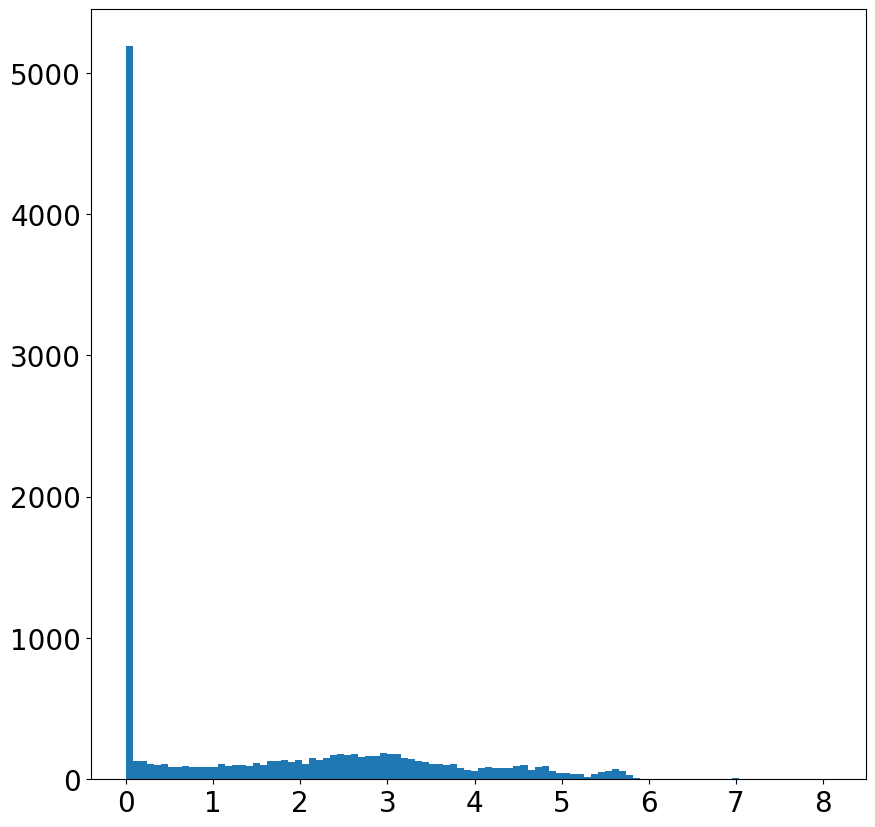

In [10]:
plt.rcParams.update({'font.size': 20})

plt.figure(figsize=(10, 10))
plt.hist(band_gaps, bins=100)
plt.savefig('Histogram_PDF', bbox_inches='tight')

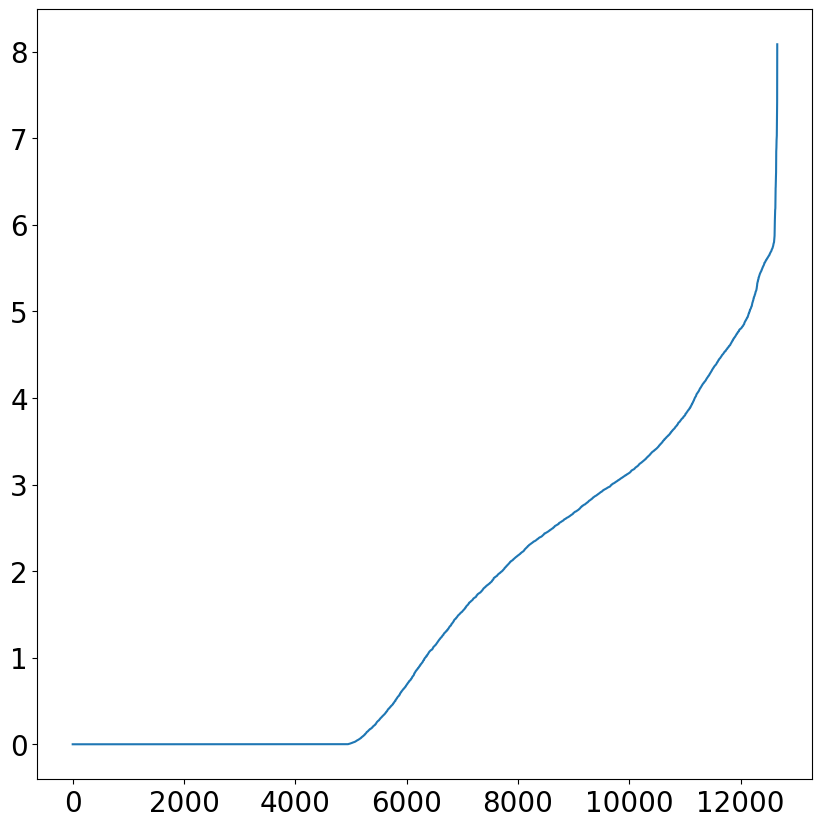

In [11]:
band_gaps_sorted=sorted(band_gaps)

# Scatter plot
plt.figure(figsize=(10,10))
plt.plot(band_gaps_sorted)
plt.ylabel('')
plt.xlabel('')
plt.savefig('ScatterPlot', bbox_inches='tight')


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset_df, band_gaps, test_size=.2, random_state=None)

In [18]:
# We need to normalize the data using a scaler

# Define the scaler
scaler = StandardScaler().fit(X_train)

# Scale the training and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Next, we create a pandas DataFrame object


RF MAE	0.4498412095181673

RF R2	0.7746797436774853

XGBOOST MAE	0.43162935681051096

XGBOOST R2	0.7703738212585449



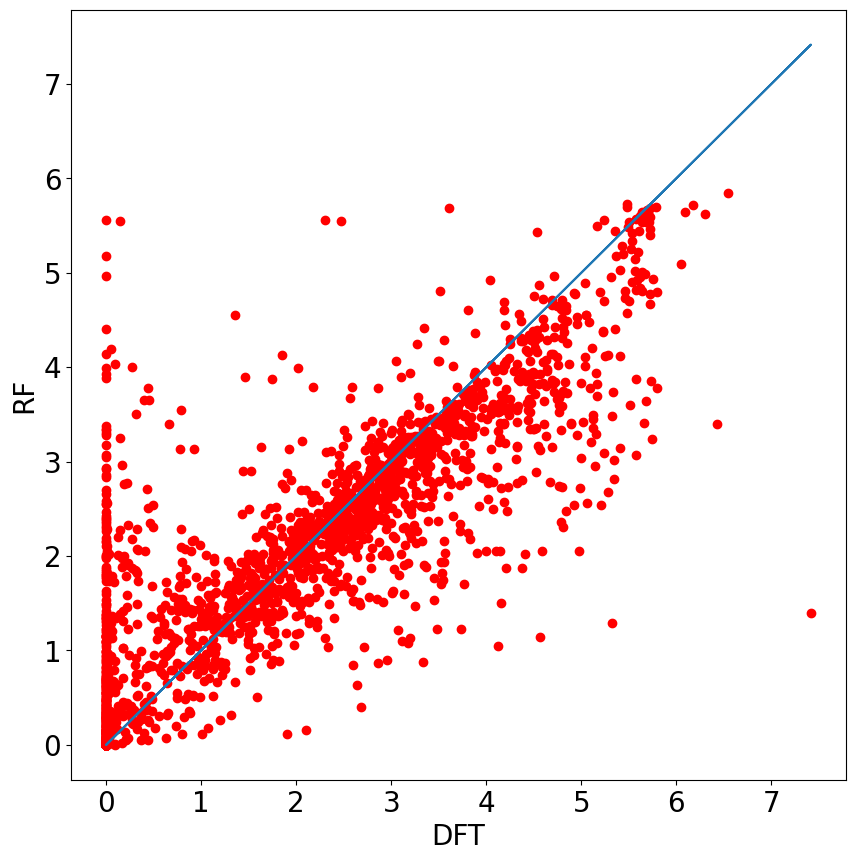

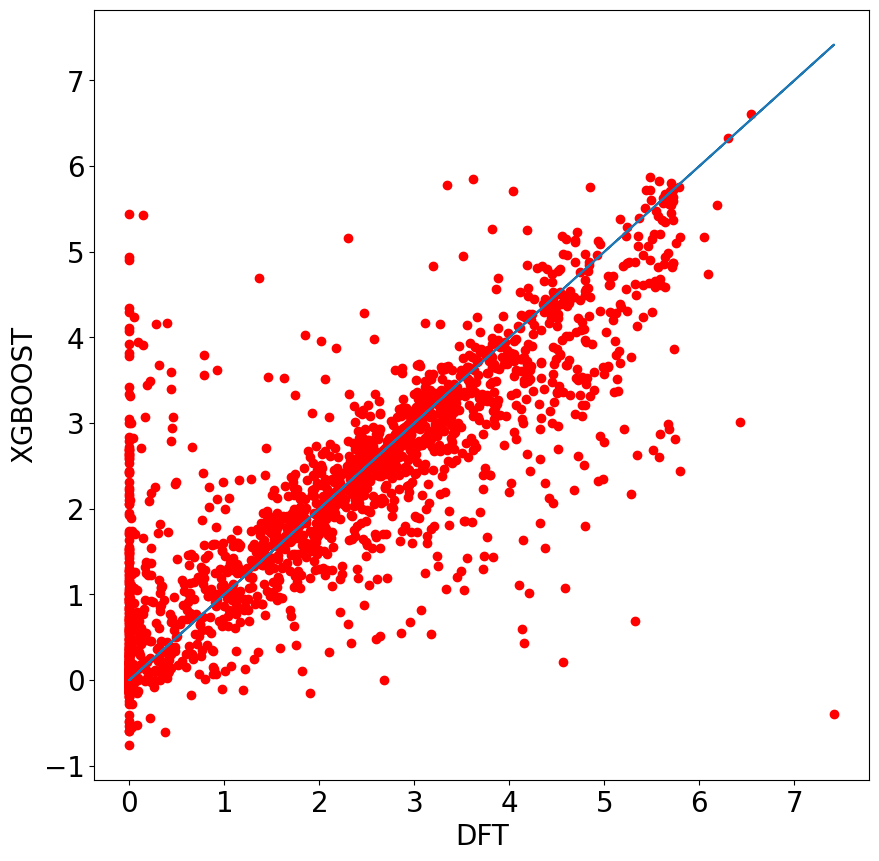

In [19]:
regr = RandomForestRegressor(n_estimators=400, max_depth=400, random_state=0)
regr.fit(X_train_scaled, y_train)
y_predicted = regr.predict(X_test_scaled)

print('RF MAE\t'+str(mean_absolute_error(y_test, y_predicted))+'\n')
print('RF R2\t'+str(r2_score(y_test, y_predicted))+'\n')

xPlot=y_test
yPlot=y_predicted
plt.figure(figsize=(10,10))
plt.plot(xPlot,yPlot,'ro')
plt.plot(xPlot,xPlot)
plt.ylabel('RF')
plt.xlabel('DFT')
plt.savefig('RF_Correlation_Test', bbox_inches='tight')


regr = XGBRegressor(objective='reg:squarederror', max_depth=10, n_estimators=400)
regr.fit(X_train_scaled, y_train)
y_predicted = regr.predict(X_test_scaled)

print('XGBOOST MAE\t'+str(mean_absolute_error(y_test, y_predicted))+'\n')
print('XGBOOST R2\t'+str(r2_score(y_test, y_predicted))+'\n')


xPlot=y_test
yPlot=y_predicted
plt.figure(figsize=(10,10))
plt.plot(xPlot,yPlot,'ro')
plt.plot(xPlot,xPlot)
plt.ylabel('XGBOOST')
plt.xlabel('DFT')
plt.savefig('XGBOOST_Correlation_Test', bbox_inches='tight')